In [1]:
import pandas as pd

In [3]:
train_data_path = "Titanic_train.csv"
test_data_path = "Titanic_test.csv"

In [4]:
train_data = pd.read_csv(train_data_path)

In [5]:
test_data = pd.read_csv(test_data_path)

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

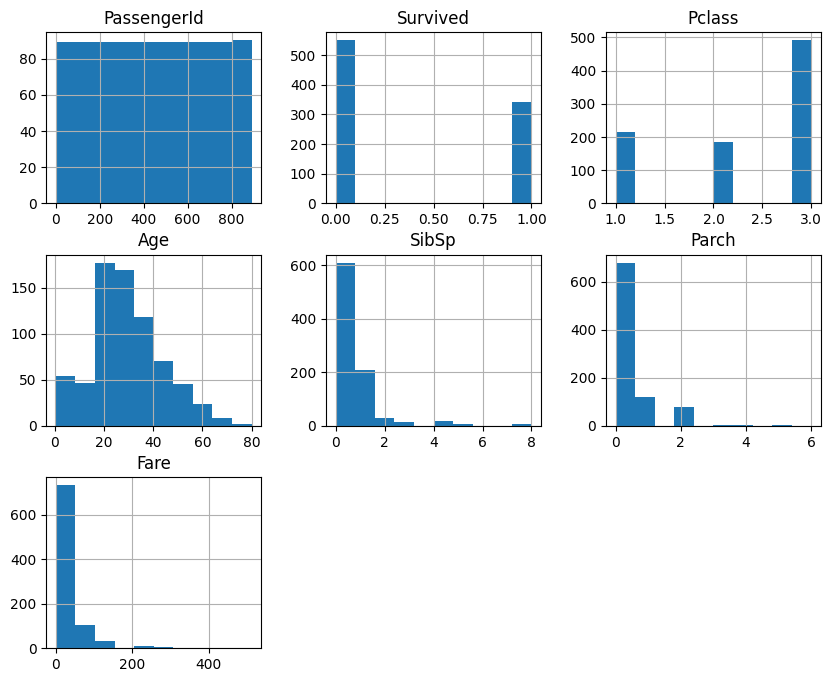

In [13]:
train_data.hist(figsize=(10, 8))
plt.show()

In [15]:
numeric_data = train_data.select_dtypes(include=['number'])

In [16]:
correlation_matrix = numeric_data.corr()

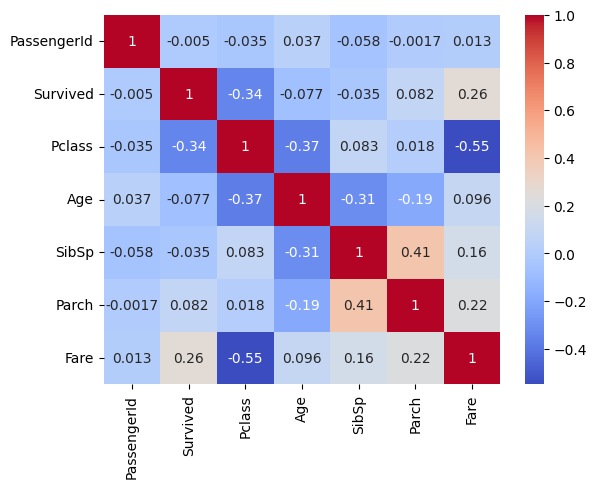

In [18]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Data Preprocessing

In [19]:
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})


 # Build Logistic Regression Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [22]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LogisticRegression()

In [34]:
X = data[['Name', 'Age', 'Sex']]
y = data['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.drop(columns=['Name'], errors='ignore')
X_test = X_test.drop(columns=['Name'], errors='ignore')

In [39]:
print("Unique values in X_train['Sex']:", X_train['Sex'].unique())
print("Unique values in X_test['Sex']:", X_test['Sex'].unique())


Unique values in X_train['Sex']: [0]
Unique values in X_test['Sex']: ['male']


In [42]:
# Perform one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)

# Align columns to ensure train and test datasets match
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [46]:
# Check the data types of the columns
print(X.dtypes)

# Display a sample of the dataset
print(X.head())


PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    0  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    1  38.0      1      0          PC 17599  71.2833   C85        C  
2    1  26.0      0      0  STON/O2. 3101282   7.9250   N

In [47]:
from sklearn.preprocessing import LabelEncoder

# Example for the 'Sex' column
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])


In [49]:
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)  # Replace with your column names

In [50]:
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)


In [51]:
# Check for missing values
print(X.isnull().sum())

# Fill missing values (example for 'Age')
X['Age'] = X['Age'].fillna(X['Age'].median())


PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])  # Replace with your numerical column names


In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [58]:
import streamlit as st
import pickle

In [60]:
import pickle

# Save the trained logistic regression model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [61]:
import pickle

# Load the model
model = pickle.load(open('logistic_model.pkl', 'rb'))

# Check if the model is loaded correctly
print(model)

LogisticRegression()


In [62]:
# Example: Making predictions
predictions = model.predict(X_test)
print(predictions)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [64]:
model = pickle.load(open('logistic_model.pkl', 'rb'))